In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
df=pd.read_csv("Regression_Insurance_Data.csv")

In [3]:
df.tail()

,age,sex,bmi,classif,children,smoker,region,charges
1333,50,male,30.97,OB1,3,no,northwest,10600.5483
1334,18,female,31.92,OB1,0,no,northeast,2205.9808
1335,18,female,36.85,OB2,0,no,southeast,1629.8335
1336,21,female,25.80,PREO,0,no,southwest,2007.9450
1337,-1,female,29.07,PREO,0,yes,northwest,29141.3603


In [4]:
df_c=df

In [5]:
df_c.columns

Index(['age', 'sex', 'bmi', 'classif', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

In [6]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   classif   1330 non-null   object 
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [7]:
df_c.isnull().sum()

age         0
sex         0
bmi         0
classif     8
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df_c['classif'].fillna(df_c['classif'].mode()[0],inplace=True)

In [9]:
df_c[df_c.duplicated()].head()

,age,sex,bmi,classif,children,smoker,region,charges
581,19,male,30.59,OB1,0,no,northwest,1639.5631


In [10]:
df_c=df_c.drop_duplicates(ignore_index=True)

In [11]:
df_c.shape

(1337, 8)

In [12]:
df_c['classif'].unique()

array(['PREO', 'OB1', 'N', 'OB2', 'OB3', 'UW'], dtype=object)

In [13]:
df_c['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [14]:
df_c['sex'].unique()

array(['female', 'male'], dtype=object)

In [15]:
df_c['smoker'].unique()

array(['yes', 'no'], dtype=object)

## EDA

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

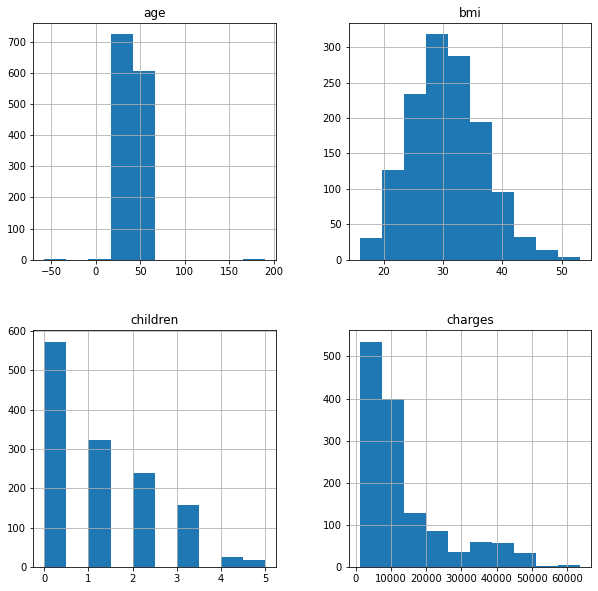

In [16]:
df_c.hist(figsize=(10,10),bins=10)

<AxesSubplot:xlabel='smoker', ylabel='count'>

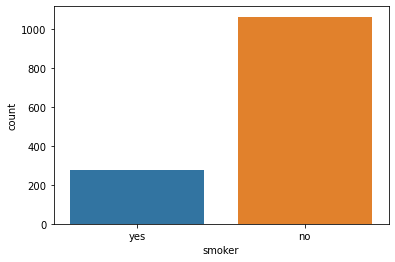

In [17]:
sns.countplot(x=df_c['smoker'])

<AxesSubplot:xlabel='sex', ylabel='count'>

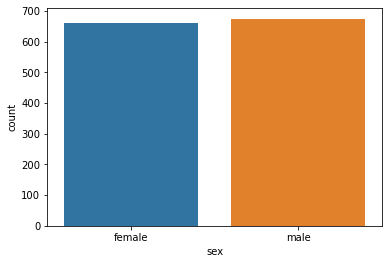

In [18]:
sns.countplot(x=df_c['sex'])

<AxesSubplot:xlabel='children', ylabel='count'>

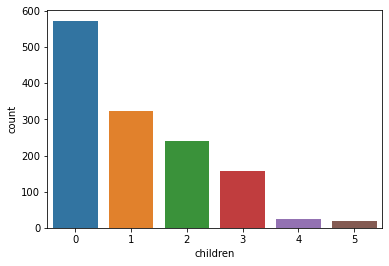

In [19]:
sns.countplot(x=df_c['children'])

<AxesSubplot:xlabel='children', ylabel='charges'>

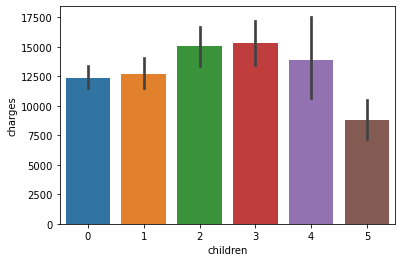

In [20]:
sns.barplot(x = 'children', y ='charges', data = df_c)

<AxesSubplot:xlabel='region', ylabel='charges'>

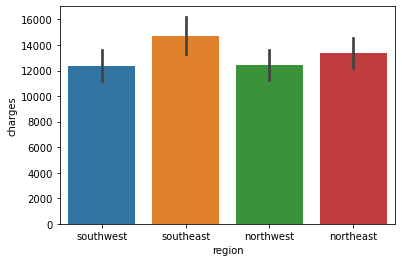

In [21]:
sns.barplot(x = 'region', y ='charges', data = df_c)

<AxesSubplot:xlabel='sex', ylabel='charges'>

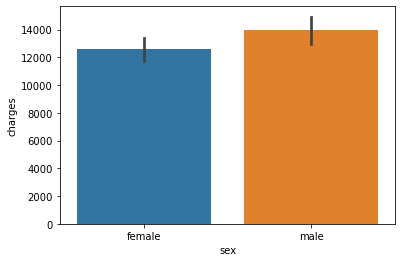

In [22]:
sns.barplot(x = 'sex', y ='charges', data = df_c)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

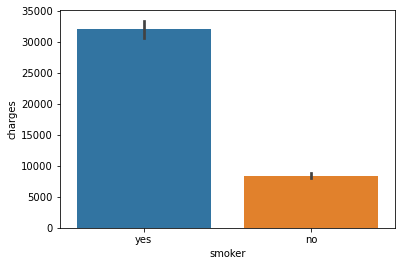

In [23]:
sns.barplot(x = 'smoker', y ='charges', data = df_c)

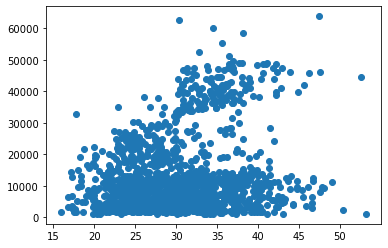

In [24]:
plt.scatter(x=df_c['bmi'],y=df_c['charges'])


Text(0, 0.5, 'Frequency')

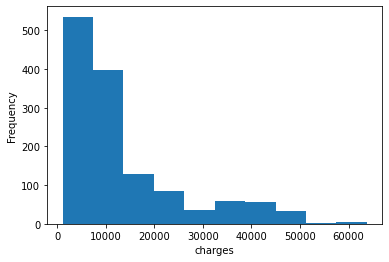

In [25]:
plt.hist(df_c['charges'],bins=10)
plt.xlabel('charges')
plt.ylabel('Frequency')

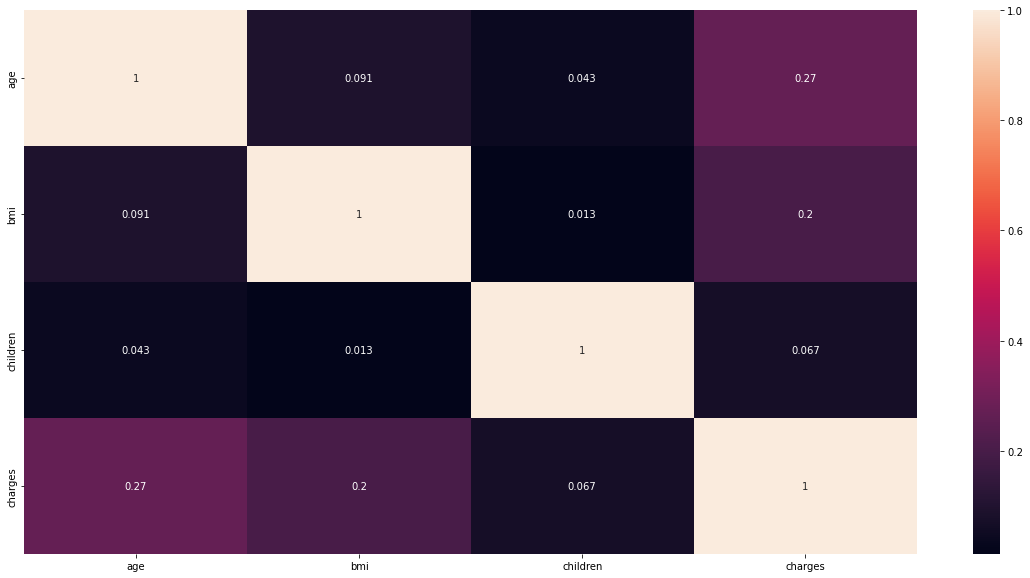

In [26]:
plt.figure(figsize=(20,10))
sns.heatmap(df_c.corr(), annot=True);

In [27]:
df_c2=df_c

In [28]:
lable_encoder=preprocessing.LabelEncoder()
col=['sex','classif','smoker','region']
for i in col:
    df_c[i]=df_c[i].astype('category')
    df_c[i]=lable_encoder.fit_transform(df_c[i])

In [29]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int32  
 2   bmi       1337 non-null   float64
 3   classif   1337 non-null   int32  
 4   children  1337 non-null   int64  
 5   smoker    1337 non-null   int32  
 6   region    1337 non-null   int32  
 7   charges   1337 non-null   float64
dtypes: float64(2), int32(4), int64(2)
memory usage: 62.8 KB


In [30]:
scaler=StandardScaler()
scaled=pd.DataFrame(scaler.fit_transform(df_c),columns=df_c.columns)

In [31]:
scaled=scaled.drop(['charges'],axis=1)

In [32]:
y=df_c.charges

In [33]:
x=scaled

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
x_train.head(2)

,age,sex,bmi,classif,children,smoker,region
1113,-1.080298,0.990324,-1.009063,-1.349351,-0.909234,-0.507702,-1.372274
967,-1.214090,0.990324,-0.806543,1.282425,0.750351,-0.507702,-1.372274


In [36]:
y_train.head(2)

1113    2396.09590
967     3279.86855
Name: charges, dtype: float64

## Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [38]:
lr.fit(x_train,y_train)

LinearRegression()

In [39]:
y_pred=lr.predict(x_test)

In [40]:
lr.score(x_train,y_train)

0.7161980956295226

In [41]:
print("MAE = ",mean_absolute_error(y_test,y_pred))
print("MSE = ",mean_squared_error(y_test,y_pred))
print("RMSE = ",mean_squared_error(y_test,y_pred, squared=False))

MAE =  4353.944085013068
MSE =  37233804.09744821
RMSE =  6101.9508435784865


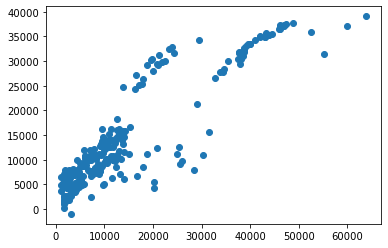

In [42]:
plt.scatter(y_test,y_pred)


## Lasso

In [43]:
from sklearn.linear_model import Lasso

In [44]:
lrl=Lasso()

In [45]:
lrl.fit(x_train,y_train)

Lasso()

In [46]:
lrl.score(x_train,y_train)

0.7161980482809898

In [47]:
y_pred_l=lrl.predict(x_test)

In [48]:
print("MAE = ",mean_absolute_error(y_test,y_pred_l))
print("MSE = ",mean_squared_error(y_test,y_pred_l))
print("RMSE = ",mean_squared_error(y_test,y_pred_l, squared=False))

MAE =  4353.903081266607
MSE =  37238750.37947356
RMSE =  6102.356133451534


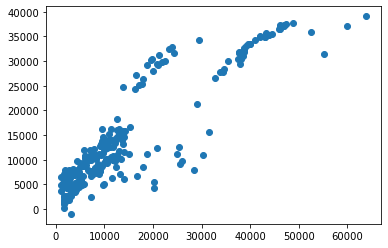

In [49]:
plt.scatter(y_test,y_pred_l)

## DecisionTreeRegressor

In [50]:
dtr=DecisionTreeRegressor(max_depth=3)

In [51]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [52]:
dtr.score(x_train,y_train)

0.8426997479703602

In [53]:
dtr_y_pred=dtr.predict(x_test)

In [54]:
mse1=mean_squared_error(y_test,dtr_y_pred)
mae1=mean_absolute_error(y_test,dtr_y_pred)
rmse1 = mean_squared_error(y_test, dtr_y_pred, squared=False)
print('mse is',mse1)
print('mae is',mae1)
print('rmse is',rmse1)

mse is 20065848.433313314
mae is 2786.2061514166353
rmse is 4479.491983842958


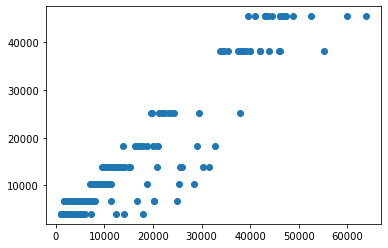

In [55]:
plt.scatter(y_test,dtr_y_pred)

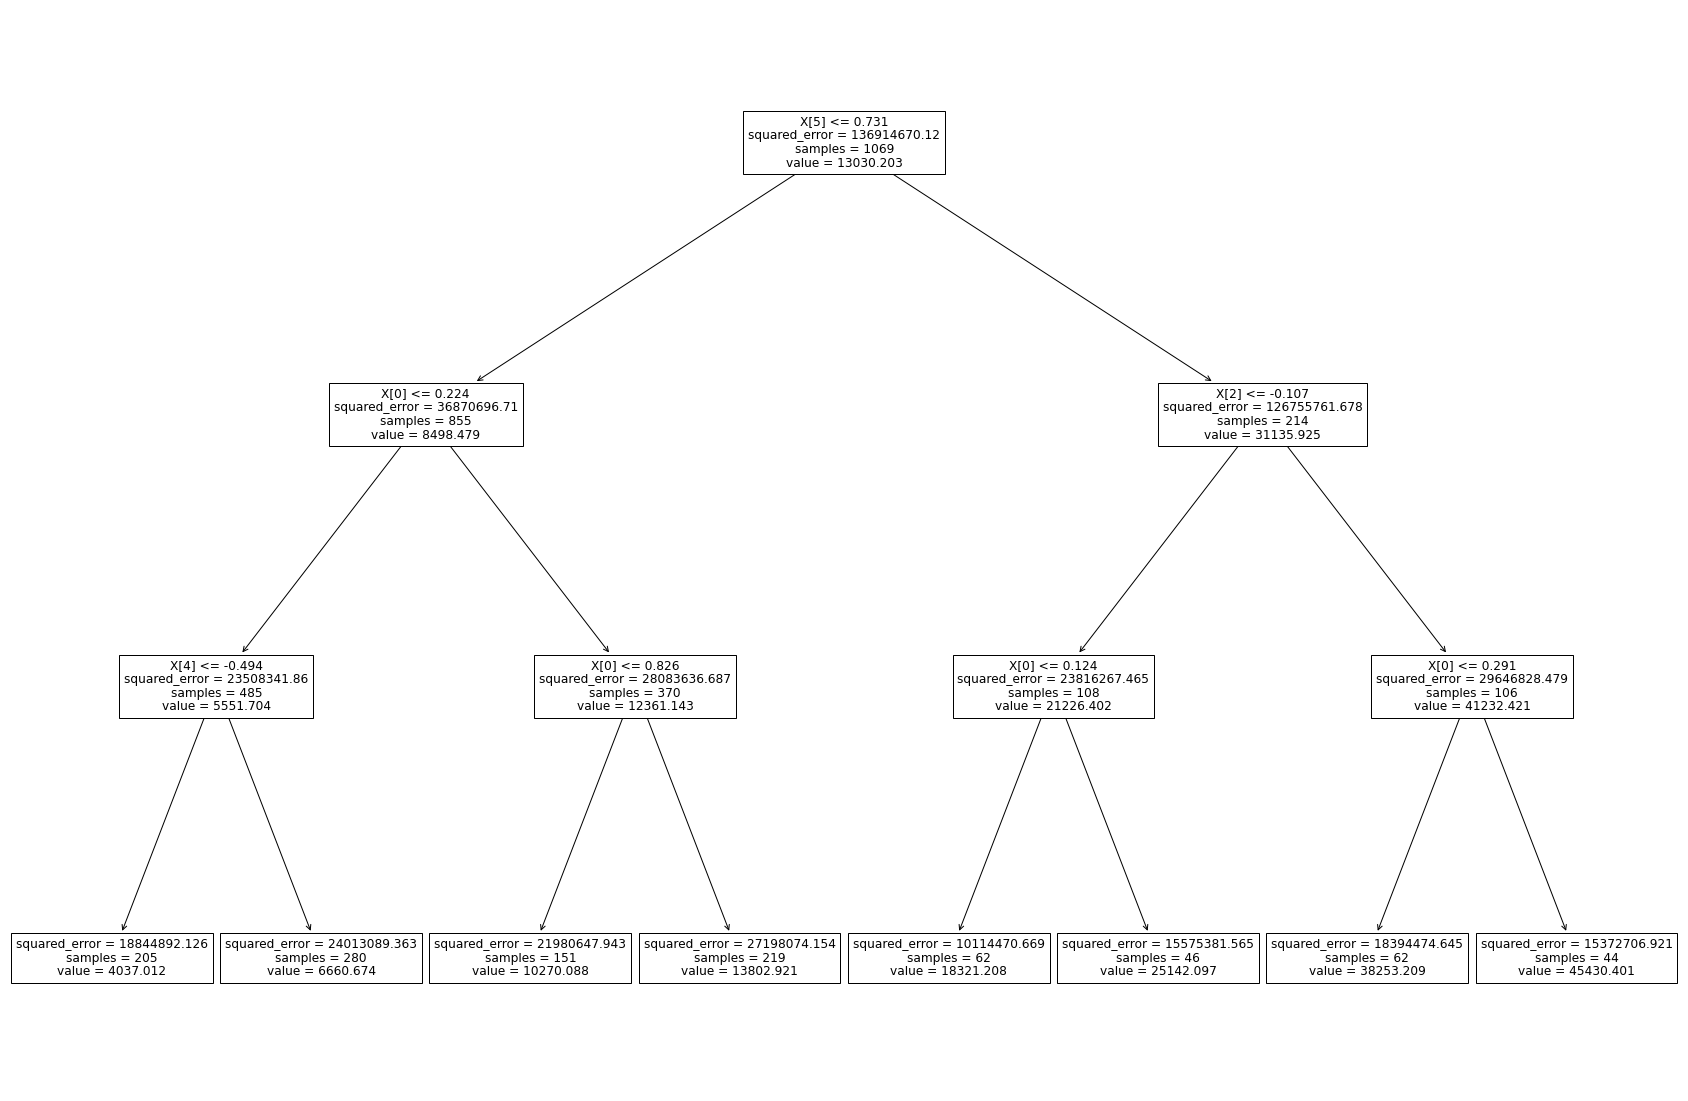

In [56]:
from sklearn import tree 

fig, ax = plt.subplots(figsize=(30,20))
tree.plot_tree(dtr)
plt.show()

## Random Forest Regressor

In [57]:
rf=RandomForestRegressor(n_estimators=10,oob_score=True) 
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10, oob_score=True)

In [58]:
kf=KFold(n_splits=10)

In [59]:
cross_val_score(rf,x,y,cv=kf,scoring="neg_mean_squared_error").mean()

-26250289.25896365

In [60]:
rf.oob_score_

0.7365139979591333

In [61]:
rf.score(x_train,y_train)

0.9656967542232444

In [62]:
par={"max_depth":[4,6,8,10,12],"n_estimators":[6,10,12]}

In [63]:
grid_s=GridSearchCV(estimator=rf,param_grid=par,cv=4,scoring="neg_mean_squared_error")

In [64]:
grid_s.fit(x_train,y_train)


GridSearchCV(cv=4,
             estimator=RandomForestRegressor(n_estimators=10, oob_score=True),
             param_grid={'max_depth': [4, 6, 8, 10, 12],
                         'n_estimators': [6, 10, 12]},
             scoring='neg_mean_squared_error')

In [65]:
grid_s.best_score_

-21663942.522109002

In [66]:
grid_s.best_estimator_

RandomForestRegressor(max_depth=4, n_estimators=10, oob_score=True)

## Random Forest Regressor best

In [67]:
rf_best=RandomForestRegressor(max_depth=4, n_estimators=10, oob_score=True) 
rf_best.fit(x_train,y_train)

RandomForestRegressor(max_depth=4, n_estimators=10, oob_score=True)

In [68]:
rf_y_pred=rf_best.predict(x_test)

In [69]:
rf_best.oob_score_

0.8280810365232323

In [70]:
rf_best.score(x_train,y_train)

0.8640548544199926

In [71]:
mse1=mean_squared_error(y_test,rf_y_pred)
mae1=mean_absolute_error(y_test,rf_y_pred)
rmse1 = mean_squared_error(y_test, rf_y_pred, squared=False)
print('mse is',mse1)
print('mae is',mae1)
print('rmse is',rmse1)

mse is 18427517.909544114
mae is 2484.4012296044457
rmse is 4292.728492409474


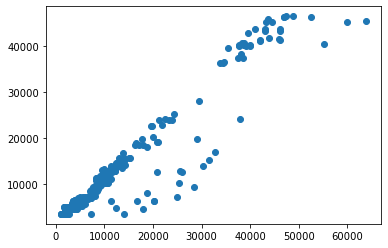

In [72]:
plt.scatter(y_test,rf_y_pred)

## SVR

In [73]:
svr = SVR()

In [74]:
svr.fit(x_train, y_train)

SVR()

In [75]:
y_pred_svr = svr.predict(x_test)
svr.score(x_train,y_train)

-0.09715856479221086

In [76]:
mse1=mean_squared_error(y_test,y_pred_svr)
mae1=mean_absolute_error(y_test,y_pred_svr)
rmse1 = mean_squared_error(y_test, y_pred_svr, squared=False)
print('mae is',mae1)
print('mse is',mse1)
print('rmse is',rmse1)

mae is 9261.572300401196
mse is 207713111.42138812
rmse is 14412.255597975916


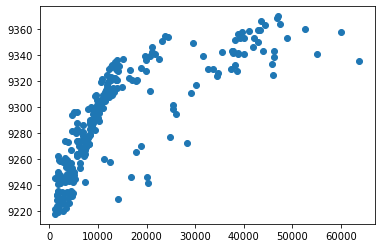

In [77]:
plt.scatter(y_test,y_pred_svr)

## stacking

In [78]:
def get_stacking():
    l0=list()
    l0.append(  ("dtr",DecisionTreeRegressor()))
    l0.append(   ("knr",KNeighborsRegressor()))
    l0.append(  ("svr",SVR()))
    
    l1=LinearRegression()
    
    model=StackingRegressor(estimators=l0,final_estimator=l1,cv=4)
    return model

In [79]:
dtm=get_stacking()

In [80]:
dtm

StackingRegressor(cv=4,
                  estimators=[('dtr', DecisionTreeRegressor()),
                              ('knr', KNeighborsRegressor()), ('svr', SVR())],
                  final_estimator=LinearRegression())

In [81]:
from sklearn.model_selection import RepeatedKFold
r_kf=RepeatedKFold(n_splits=4)

In [82]:
st_result=cross_val_score(dtm,x,y,cv=4,scoring="neg_mean_squared_error")

In [83]:
st_result.mean()

-24542452.558895055

In [84]:
dic={
    'Algorithm':['Linear Regression','Decision Tree','Random Forest','SVR'],
    'MSE':[37233804.09,20065848.4,18902240.47,207713111.42],
    'MAE':[4353.94, 2786.20,2633.26, 9261.57],
    'RMSE':[6101.95,4479.49,4347.67,14412.25]

}

In [85]:
data=pd.DataFrame(dic)

In [86]:
data

,Algorithm,MSE,MAE,RMSE
0,Linear Regression,3.723380e+07,4353.94,6101.95
1,Decision Tree,2.006585e+07,2786.20,4479.49
2,Random Forest,1.890224e+07,2633.26,4347.67
3,SVR,2.077131e+08,9261.57,14412.25


In [87]:
dic1={
    
    'Age':[],'Gender':[],'bmi':[],'classif':[],'children':[],'smoker':[],'region':[]
}
new_data=pd.DataFrame(dic1)

In [88]:
new_data

,Age,Gender,bmi,classif,children,smoker,region


In [89]:
import ipywidgets as rb

In [90]:
def pred():
    new_input=[]
    Age=int(input('Enter age : '))
    new_input.append(Age)

    Gender=input('Enter Gender : ')
    new_input.append(Gender)

    bmi=float(input('Enter bmi : '))
    new_input.append(bmi)

    classif=input('Enter classif : ')
    new_input.append(classif)

    children=int(input('Enter children : '))
    new_input.append(children)

    smoker=input('Enter smoker : ')
    new_input.append(smoker)

    region=input('Enter region : ')
    new_input.append(region)
    
    
    
    
    
    return new_input


In [91]:
new_input=pred()

Enter age : 25
Enter Gender : male
Enter bmi : 15
Enter classif : PREO
Enter children : 2
Enter smoker : yes
Enter region : southwest


In [92]:
new_input

[25, 'male', 15.0, 'PREO', 2, 'yes', 'southwest']

In [93]:
new_data.loc[len(new_data)]=new_input

In [94]:
new_data

,Age,Gender,bmi,classif,children,smoker,region
0,25,male,15.0,PREO,2,yes,southwest


In [95]:
new_data.columns

Index(['Age', 'Gender', 'bmi', 'classif', 'children', 'smoker', 'region'], dtype='object')

In [96]:
col=[ 'Gender' ,'classif', 'smoker', 'region']
for i in col:
    new_data[i]=new_data[i].astype('category')
    new_data[i]=lable_encoder.fit_transform(new_data[i])
        
        
scaler=StandardScaler()
scaled1=pd.DataFrame(scaler.fit_transform(new_data),columns=new_data.columns)
    
predict=lr.predict(new_data)
    
print(predict)

[122812.21061033]


In [97]:
dic2={
    
    'Age':[],'Gender':[],'bmi':[],'classif':[],'children':[],'smoker':[],'region':[]
}
new_data1=pd.DataFrame(dic1)

In [98]:
def pred1():
    new_input1=[]
    Age=input('Enter age : ')
    new_input1.append(Age)

    Gender=input('Enter Gender : ')
    new_input1.append(Gender)

    bmi=input('Enter bmi : ')
    new_input1.append(bmi)

    classif=input('Enter classif : ')
    new_input1.append(classif)

    children=input('Enter children : ')
    new_input1.append(children)

    smoker=input('Enter smoker : ')
    new_input1.append(smoker)

    region=input('Enter region : ')
    new_input1.append(region)
    
    
    
    
    
    return new_input1

In [99]:
scaled

,age,sex,bmi,classif,children,smoker,region
0,-1.347883,-1.009771,-0.453160,1.282425,-0.909234,1.969660,1.343163
1,-1.414779,0.990324,0.509422,-0.691407,-0.079442,-0.507702,0.438017
2,-0.745816,0.990324,0.383155,-0.691407,1.580143,-0.507702,0.438017
3,-2.618912,0.990324,-1.305052,-1.349351,-0.909234,-0.507702,-0.467128
4,-0.478231,0.990324,-0.292456,1.282425,-0.909234,-0.507702,-0.467128
...,...,...,...,...,...,...,...
1332,0.725902,0.990324,0.050269,-0.691407,1.580143,-0.507702,-0.467128
1333,-1.414779,-1.009771,0.206053,-0.691407,-0.909234,-0.507702,-1.372274
1334,-1.414779,-1.009771,1.014490,-0.033463,-0.909234,-0.507702,0.438017
1335,-1.214090,-1.009771,-0.797524,1.282425,-0.909234,-0.507702,1.343163


In [100]:
new_input1=pred1()

Enter age : -1.347883
Enter Gender : 0.990324
Enter bmi : 0.383155
Enter classif : -1.349351
Enter children : -0.909234
Enter smoker : -0.507702	
Enter region : -0.467128


In [101]:
new_input1


['-1.347883',
 '0.990324',
 '0.383155',
 '-1.349351',
 '-0.909234',
 '-0.507702\t',
 '-0.467128']

In [102]:
new_data1.loc[len(new_data1)]=new_input1

In [103]:
new_data1

,Age,Gender,bmi,classif,children,smoker,region
0,-1.347883,0.990324,0.383155,-1.349351,-0.909234,-0.507702\t,-0.467128


In [104]:
predict1=lr.predict(new_data1)
    
print(predict1)

[5588.59026206]
